Ovaj projekt koristi podatke o studentima kako bi predvidio njihovu konzumaciju alkohola vikendom koristeći modele SVM i logističke regresije.

Podaci su učitani, očišćeni i transformirani, te podijeljeni na trening i test skupove. Trenirani modeli su evaluirani pomoću različitih metrika, uključujući točnost i matriks zabune.

Vizualizacije kao što su linijski graf, pie graf i bar grafovi pomažu u razumijevanju distribucije i utjecaja različitih faktora kao što su dob, spol i obrazovanje roditelja na konzumaciju alkohola.

Rezultati pomažu u identifikaciji rizičnih skupina za ciljane preventivne mjere.


In [45]:
# Uvoz potrebnih biblioteka i modula
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# Spajanje na drive
from google.colab import drive
drive.mount('/content/drive')

# URL za dataset
# https://www.kaggle.com/datasets/uciml/student-alcohol-consumption


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Učitavanje podataka

file_path_mat = '/content/drive/My Drive/Colab Notebooks/Strojno-Ucenje/student-mat.csv'
data = pd.read_csv(file_path_mat)

# Prikaz prvih nekoliko redova tablice
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


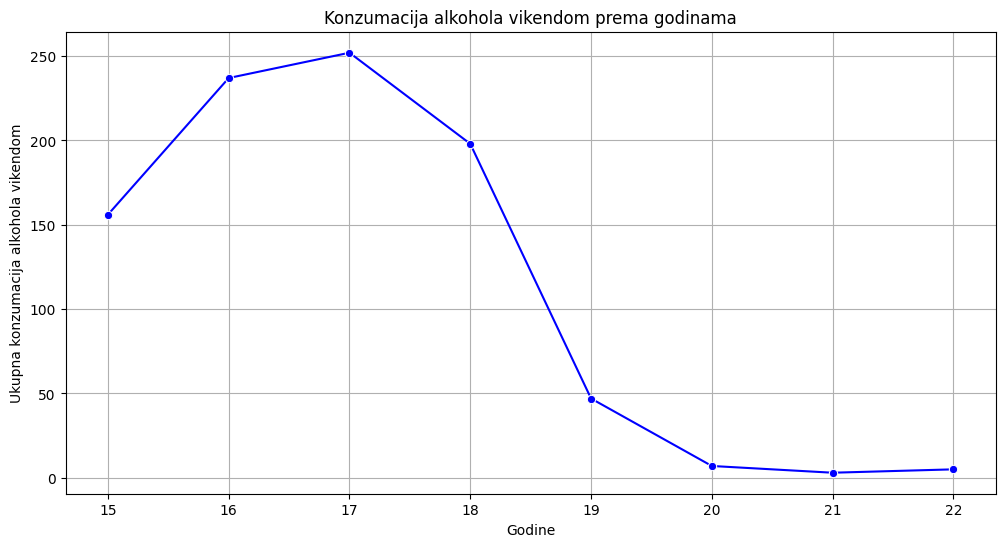

In [47]:
# Agregiranje podataka za linijski graf
age_alcohol = data.groupby('age')['Walc'].sum().reset_index()

# Kreiranje linijskog grafa za konzumaciju alkohola prema godinama
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='Walc', data=age_alcohol, marker='o', color='b')
plt.xlabel('Godine')
plt.ylabel('Ukupna konzumacija alkohola vikendom')
plt.title('Konzumacija alkohola vikendom prema godinama')
plt.grid(True)
plt.show()


Linijski graf:
Konzumacija alkohola vikendom prema godinama
X-osa (Godine): Prikazuje dob studenata.

Y-osa (Ukupna konzumacija alkohola): Prikazuje ukupnu konzumaciju alkohola vikendom.

Linija:

Prikazuje trend konzumacije alkohola u različitim dobnim skupinama.

Interpretacija: Možemo vidjeti kako konzumacija alkohola varira s godinama.

Ako linija raste, konzumacija se povećava s godinama, a ako pada, smanjuje se.

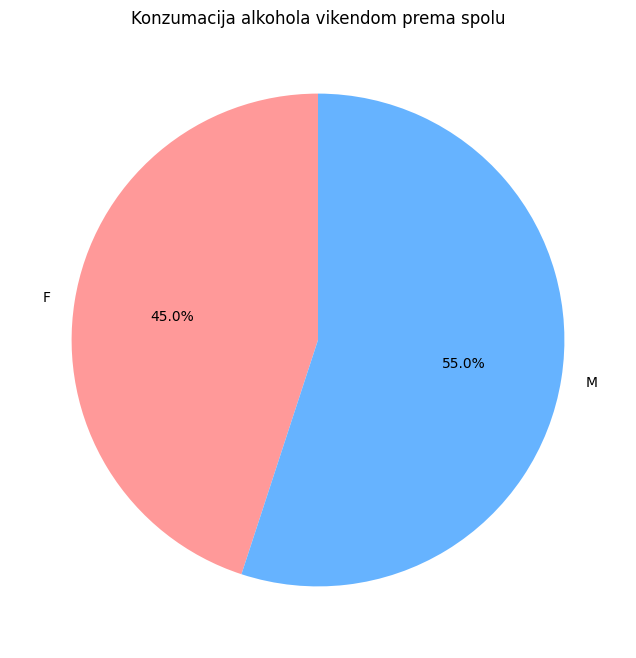

In [48]:
# Agregiranje podataka za pie chart
sex_alcohol = data.groupby('sex')['Walc'].sum()

# Kreiranje pie charta
plt.figure(figsize=(8, 8))
sex_alcohol.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Konzumacija alkohola vikendom prema spolu')
plt.ylabel('')
plt.show()

Pie graf: Konzumacija alkohola vikendom prema spolu

Pie dijelovi: Prikazuju udio ukupne konzumacije alkohola između muškaraca i žena.

Boje: Svaka boja predstavlja različiti spol (roza za žene, plava za muškarce).

Postotak: Prikazuje postotak ukupne konzumacije alkohola za svaki spol.

In [49]:
# Odabir relevantnih značajki i ciljne varijable
features = data.drop(['Dalc', 'Walc'], axis=1)
target = data['Walc']  # Primjer: Predviđanje konzumacije alkohola vikendom

# Pretvaranje kategorijalnih varijabli u dummy varijable
features = pd.get_dummies(features, drop_first=True)

# Podjela skupa podataka na skup za treniranje i skup za testiranje
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardizacija vrijednosti značajki
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
# Inicijalizacija i treniranje SVM klasifikatora
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

Definicija
Support Vector Machine (SVM) je nadziran algoritam za klasifikaciju koji traži optimalnu hiperravninu koja razdvaja podatke u različite klase s maksimalnom marginom. Hiperravnina je višedimenzionalna ravnina koja razdvaja podatke u dvije klase.

Svrha
SVM se koristi za klasifikaciju podataka gdje je potrebno pronaći granicu koja najbolje razdvaja dvije ili više klasa. Maksimiziranjem margine između klasa, SVM postiže robustnu klasifikaciju, čak i kada podaci nisu linearno odvojivi, uz pomoć kernela za nelinearnu separaciju.

In [51]:
# Izrada predviđanja
y_pred = svm_model.predict(X_test)

# Evaluacija modela
print("Točnost:", accuracy_score(y_test, y_pred))
print("Izvještaj klasifikacije:\n", classification_report(y_test, y_pred))


Točnost: 0.37815126050420167
Izvještaj klasifikacije:
               precision    recall  f1-score   support

           1       0.49      0.64      0.56        47
           2       0.17      0.11      0.13        27
           3       0.20      0.17      0.19        23
           4       0.40      0.38      0.39        16
           5       0.40      0.33      0.36         6

    accuracy                           0.38       119
   macro avg       0.33      0.33      0.33       119
weighted avg       0.34      0.38      0.36       119



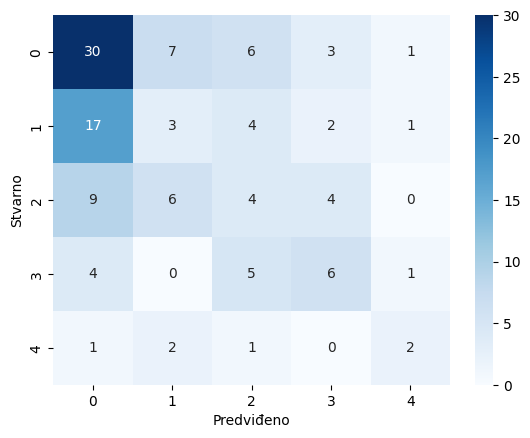

In [52]:
# Prikaz matrice zabune
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()


Matrica zabune je alat za evaluaciju performansi klasifikacijskog modela, prikazujući stvarne i predviđene vrijednosti. Sastoji se od True Positives (TP), True Negatives (TN), False Positives (FP) i False Negatives (FN). Preciznost (TP / (TP + FP)) pokazuje točnost pozitivnih predikcija, dok odziv (TP / (TP + FN)) pokazuje sposobnost modela da identificira sve pozitivne slučajeve. Vizualizacija matrice zabune omogućuje detaljno sagledavanje točnosti modela i identifikaciju pogrešaka u predikcijama.

**PyTorch - Logistička Regresija - Tenzori**


PyTorch je open-source biblioteka za strojno učenje, razvijena od strane Facebook's AI Research lab (FAIR), koja omogućuje jednostavno kreiranje i treniranje neuronskih mreža s podrškom za dinamičke grafove izračuna i GPU akceleraciju.



Tenzori su osnovne podatkovne strukture u PyTorchu koje omogućuju manipulaciju višedimenzionalnim podacima. Generaliziraju skalare, vektore i matrice te omogućuju učinkovite matematičke operacije potrebne za duboko učenje.

In [53]:
# Odabir značajki i ciljne varijable
features = data.drop(['Dalc', 'Walc'], axis=1)
target = data['Walc']  # Pretpostavimo da je 'Walc' ciljana varijabla koja može imati vrijednosti 1-5

# Pretvaranje kategorijalnih varijabli u dummy varijable
features = pd.get_dummies(features, drop_first=True)

# Podjela podataka
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardizacija
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pretvorba u tenzore
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values - 1, dtype=torch.long)  # Osiguraj da su ciljne vrijednosti u rasponu [0, 4]
y_test = torch.tensor(y_test.values - 1, dtype=torch.long)

In [54]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

input_dim = X_train.shape[1]
output_dim = len(torch.unique(y_train))  # Broj jedinstvenih klasa u ciljnim podacima
model = LogisticRegressionModel(input_dim, output_dim)


Definicija:

Logistička regresija je statistički model koji koristi logističku funkciju za modeliranje binarne zavisne varijable.

Izračunava vjerojatnosti pomoću sigmoidne funkcije i predviđa na osnovu praga (obično 0.5).

Svrha:

Cilj logističke regresije je modelirati vjerojatnost da se određeni podatak klasificira u jednu od dvije klase.

Koristi se kada je cilj predvidjeti binarni ishod, ali može se proširiti i na više klasa (multinomialna logistička regresija).

Model je jednostavan za interpretaciju, jer koeficijenti pokazuju utjecaj svake značajke na logaritamske šanse ciljne varijable.

In [55]:
# Treniranje modela
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.7034
Epoch [20/100], Loss: 1.6734
Epoch [30/100], Loss: 1.6453
Epoch [40/100], Loss: 1.6189
Epoch [50/100], Loss: 1.5942
Epoch [60/100], Loss: 1.5709
Epoch [70/100], Loss: 1.5490
Epoch [80/100], Loss: 1.5285
Epoch [90/100], Loss: 1.5092
Epoch [100/100], Loss: 1.4911


In [56]:
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted)
    print(f'Točnost: {accuracy:.4f}')
    print('Izvještaj klasifikacije:')
    print(classification_report(y_test, predicted))


Točnost: 0.2773
Izvještaj klasifikacije:
              precision    recall  f1-score   support

           0       0.41      0.40      0.41        47
           1       0.23      0.19      0.20        27
           2       0.27      0.26      0.27        23
           3       0.19      0.19      0.19        16
           4       0.00      0.00      0.00         6

    accuracy                           0.28       119
   macro avg       0.22      0.21      0.21       119
weighted avg       0.29      0.28      0.28       119




Epoch je jedan potpuni prolazak kroz cijeli skup podataka za treniranje.
Kada model uči, prolazi kroz podatke više puta kako bi poboljšao svoje predikcije. Svaki prolazak kroz cijeli skup podataka naziva se epoch.


Entropy Loss ili Cross-Entropy Loss je funkcija gubitka koja mjeri razliku između predviđenih vrijednosti modela i stvarnih vrijednosti.
 Cilj modela je minimizirati taj gubitak kako bi njegove predikcije bile što točnije.


Zaključci iz dobivenih podataka:

Točnost modela: Kroz metrike poput točnosti, možemo vidjeti koliko je model uspješan u predviđanju konzumacije alkohola.

Izvještaj klasifikacije: Pruža detalje o preciznosti, odzivu i F1 rezultatu za svaku klasu, što pomaže u razumijevanju kako model performira na različitim razinama konzumacije alkohola.

Matrica zabune: Prikazuje gdje model najčešće griješi, omogućujući nam da identificiramo obrasce i potencijalna područja za poboljšanje modela.


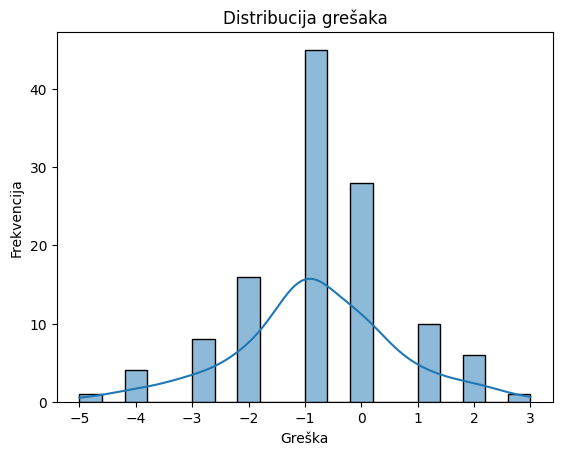

In [57]:
errors = y_test - y_pred

# Vizualizacija distribucije grešaka
plt.figure()
sns.histplot(errors, kde=True)
plt.xlabel('Greška')
plt.ylabel('Frekvencija')
plt.title('Distribucija grešaka')
plt.show()


**Graf za distribuciju grešaka**

Graf za distribuciju grešaka prikazuje razlike između stvarnih i predviđenih vrijednosti modela. Svaka vrijednost na x-osi predstavlja veličinu greške, dok y-osa prikazuje učestalost tih grešaka.

Tumačenje

0: Model je točno predvidio vrijednost.

-1, -2, ...: Model je podcijenio stvarne vrijednosti za 1, 2, ili više jedinica.

1, 2, ...: Model je precijenio stvarne vrijednosti za 1, 2, ili više jedinica.

Negativne vrijednosti: Pokazuju koliko često i koliko puno model podcjenjuje konzumaciju alkohola.

Pozitivne vrijednosti: Pokazuju koliko često i koliko puno model precjenjuje konzumaciju alkohola.

Blizu 0: Više vrijednosti oko 0 ukazuju na točniji model.

